In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from scipy.stats import spearmanr
import numpy as np
import pandas as pd
import deconomix

In [7]:
X_ref = pd.read_pickle("../Test/B05a_X_ref.pkl").astype(np.float64)
gamma = pd.read_pickle("../Test/gamma.pkl")
tcga_bulks = pd.read_pickle("../Test/tcga_conv_norm.pkl").astype(np.float64)
tcga_subtypes = pd.read_csv("../Test/tcga_subtype.csv").values.flatten()


In [8]:
tcga_LumA = tcga_bulks.iloc[:, tcga_subtypes == "LumA"]
tcga_LumB = tcga_bulks.iloc[:, tcga_subtypes == "LumB"]
tcga_Her2 = tcga_bulks.iloc[:, tcga_subtypes == "Her2"]
tcga_Basal = tcga_bulks.iloc[:, tcga_subtypes == "Basal"]

In [9]:
# Calculate gamma_ones per subtype
gamma_ones_LumA = pd.DataFrame(1. / tcga_LumA.shape[1] * np.ones(gamma.shape[0]) / (tcga_LumA.mean(axis=1))**2,
                               dtype=np.float32,
                               columns=gamma.columns,
                               index=gamma.index)
                               
gamma_ones_LumB = pd.DataFrame(1. / tcga_LumB.shape[1] * np.ones(gamma.shape[0]) / (tcga_LumB.mean(axis=1))**2,
                               dtype=np.float32,
                               columns=gamma.columns,
                               index=gamma.index)

gamma_ones_Her2 = pd.DataFrame(1. / tcga_Her2.shape[1] * np.ones(gamma.shape[0]) / (tcga_Her2.mean(axis=1))**2,
                               dtype=np.float32,
                               columns=gamma.columns,
                               index=gamma.index)
gamma_ones_Basal = pd.DataFrame(1. / tcga_Basal.shape[1] * np.ones(gamma.shape[0]) / (tcga_Basal.mean(axis=1))**2,
                                dtype=np.float32,
                                columns=gamma.columns,
                                index=gamma.index)

Preparing Job List
Preparing Baseline Model


  0%|          | 0/1000 [00:00<?, ?it/s]

Running jobs: 100%|██████████| 105/105 [16:20<00:00,  9.34s/it] 


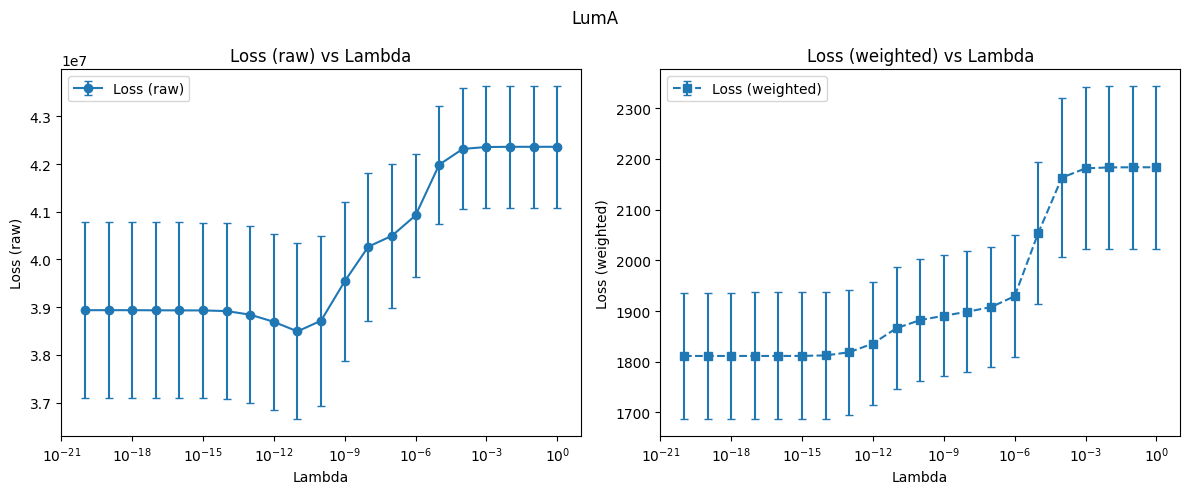

np.float64(1e-08)

In [10]:
model_HPS_LumA = deconomix.experimental.HPS2(X_ref, tcga_LumA, gamma_ones_LumA,
                                             lambdas = np.logspace(-20, 0, num=21))
model_HPS_LumA.run(n_workers=50)
model_HPS_LumA.plot_results(title='LumA', path='HPS2_LumA_with_xc.png')
model_HPS_LumA.get_lambda_1se()

Preparing Job List
Preparing Baseline Model


  0%|          | 0/1000 [00:00<?, ?it/s]

Running jobs: 100%|██████████| 105/105 [14:40<00:00,  8.39s/it] 


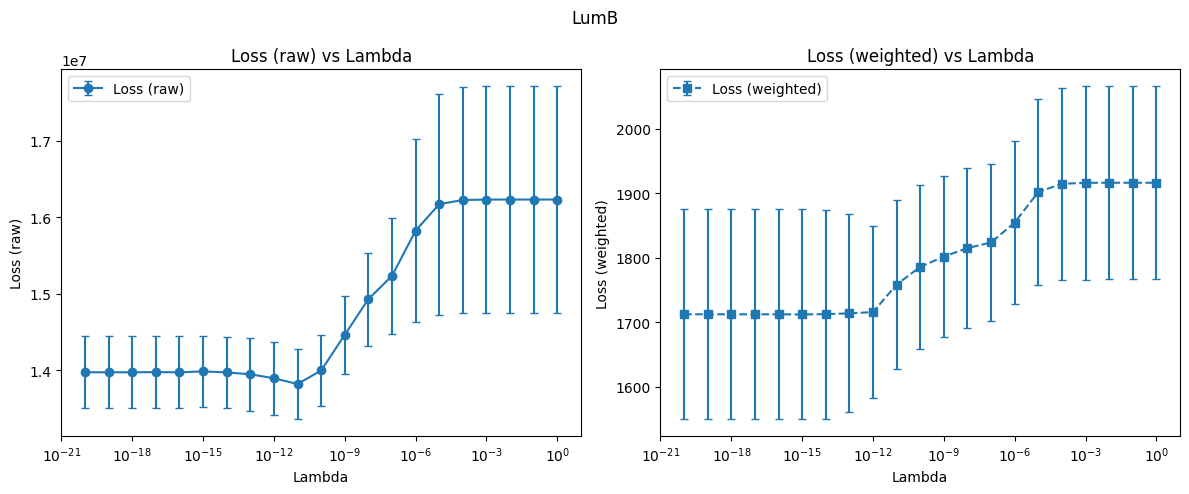

np.float64(1e-10)

In [11]:
model_HPS_LumB = deconomix.experimental.HPS2(X_ref, tcga_LumB, gamma_ones_LumB,
                                             lambdas = np.logspace(-20, 0, num=21))
model_HPS_LumB.run(n_workers=50)
model_HPS_LumB.plot_results(title='LumB', path='HPS2_LumB_with_xc.png')
model_HPS_LumB.get_lambda_1se()

Preparing Job List
Preparing Baseline Model


  0%|          | 0/1000 [00:00<?, ?it/s]

Running jobs: 100%|██████████| 105/105 [10:16<00:00,  5.87s/it] 


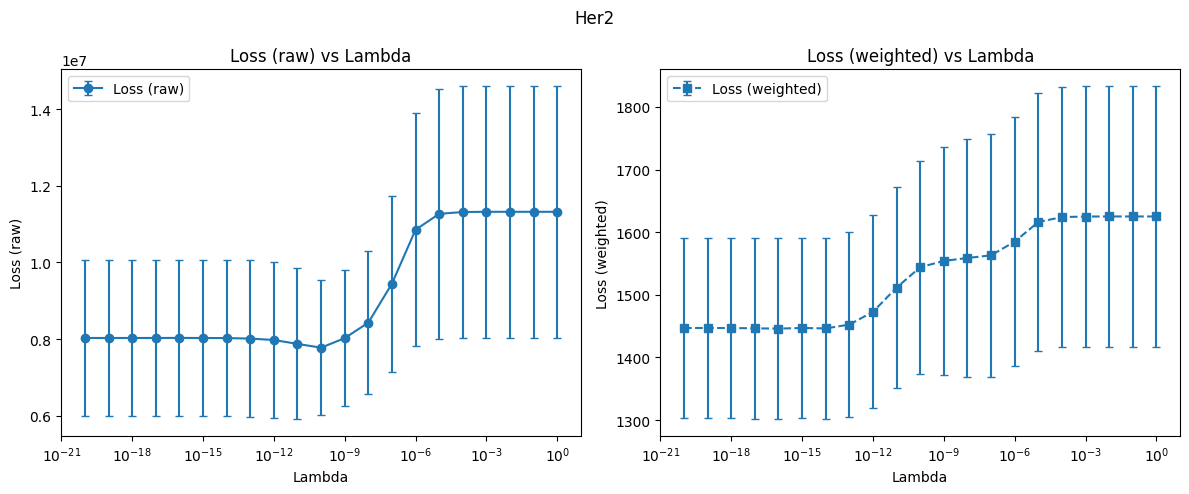

np.float64(1e-07)

In [12]:

model_HPS_Her2 = deconomix.experimental.HPS2(X_ref, tcga_Her2, gamma_ones_Her2,
                                             lambdas = np.logspace(-20, 0, num=21))
model_HPS_Her2.run(n_workers=50)
model_HPS_Her2.plot_results(title='Her2', path='HPS2_Her2_with_xc.png')
model_HPS_Her2.get_lambda_1se()

Preparing Job List
Preparing Baseline Model


  0%|          | 0/1000 [00:00<?, ?it/s]

Running jobs: 100%|██████████| 105/105 [16:07<00:00,  9.21s/it] 


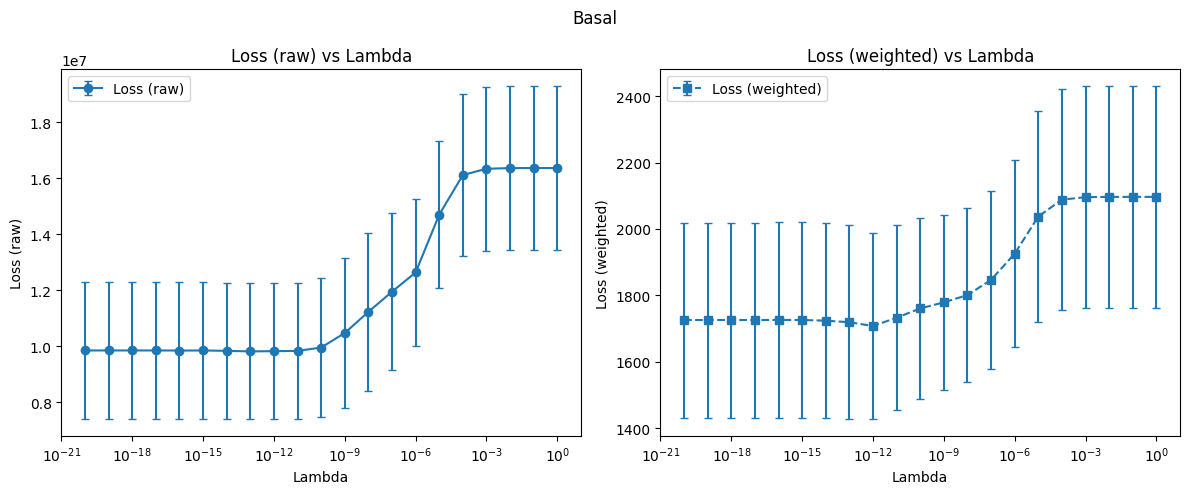

np.float64(1e-07)

In [13]:
model_HPS_Basal = deconomix.experimental.HPS2(X_ref, tcga_Basal, gamma_ones_Basal,
                                              lambdas = np.logspace(-20, 0, num=21))
model_HPS_Basal.run(n_workers=50)
model_HPS_Basal.plot_results(title='Basal', path='HPS2_Basal_with_xc.png')
model_HPS_Basal.get_lambda_1se()